# Comparison of Word Frequency in the Last 3000 Tweets by the 2016 Presidential Nominees and Top Prospective 2020 Democratic Presidential Candidates
## Author: Siddharth Nanda

In [1]:
# Package imports
import pandas as pd
import twitter
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Twitter handles for each politician

# 2016 Nominees
trump = 'realDonaldTrump'
clinton = 'HillaryClinton'

# Top 6 Prospects
biden = 'JoeBiden'
booker = 'CoryBooker'
sanders = 'BernieSanders'

harris = 'KamalaHarris'
gillibrand = 'SenGillibrand'
warren = 'elizabethforma'

In [3]:
# DataFrames for favorites/retweets/tweets for each politician
trump_data = twitter.tweets_favorites_retweets(trump)
clinton_data = twitter.tweets_favorites_retweets(clinton)

biden_data = twitter.tweets_favorites_retweets(biden)
booker_data = twitter.tweets_favorites_retweets(booker)
sanders_data = twitter.tweets_favorites_retweets(sanders)

harris_data = twitter.tweets_favorites_retweets(harris)
gillibrand_data = twitter.tweets_favorites_retweets(gillibrand)
warren_data = twitter.tweets_favorites_retweets(warren)

In [4]:
# Text files with the contents of each politicians tweets
trump_data['tweets'].to_csv(r'trump.txt', header=None, index=None, sep=' ', mode='a')
clinton_data['tweets'].to_csv(r'clinton.txt', header=None, index=None, sep=' ', mode='a')

biden_data['tweets'].to_csv(r'biden.txt', header=None, index=None, sep=' ', mode='a')
booker_data['tweets'].to_csv(r'booker.txt', header=None, index=None, sep=' ', mode='a')
sanders_data['tweets'].to_csv(r'sanders.txt', header=None, index=None, sep=' ', mode='a')

harris_data['tweets'].to_csv(r'harris.txt', header=None, index=None, sep=' ', mode='a')
gillibrand_data['tweets'].to_csv(r'gillibrand.txt', header=None, index=None, sep=' ', mode='a')
warren_data['tweets'].to_csv(r'warren.txt', header=None, index=None, sep=' ', mode='a')

In [5]:
# Loads contents of all tweets into variables
trump_content = open('trump.txt').read()
clinton_content = open('clinton.txt').read()

biden_content = open('biden.txt').read()
booker_content = open('booker.txt').read()
sanders_content = open('sanders.txt').read()

harris_content = open('harris.txt').read()
gillibrand_content = open('gillibrand.txt').read()
warren_content = open('warren.txt').read()

In [6]:
# Two sets containing words to be removed
stop_words = set(stopwords.words('english'))
manual_removal = set(['http', 'https', 'amp', 'a', 'and', 'but', 'because', 'it', "n't", 'or', 'so', 'rt', 'the'])

In [7]:
'''Two functions: one to get the 25 most common words used by each politician in their tweets
and another to add those words and the frequency of their use to a DataFrame'''
def cleanAndFindMostCommon(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if not word in stop_words]
    final_words = []
    for word in filtered_words:
        if re.match('[a-zA-Z]+', word) and word.lower() not in manual_removal:
            final_words.append(word.lower())
    word_frequencies = nltk.FreqDist(final_words)
    return word_frequencies.most_common(25)

def addToFrame(words):
    pwords = []
    pfreqs = []
    for x, y in words:
        pwords.append(x)
        pfreqs.append(y)
    return pd.DataFrame({'Word': pwords, 'Frequency': pfreqs})

In [8]:
# Creates DataFrames for use in graphing
trump_dist = addToFrame(cleanAndFindMostCommon(trump_content))
clinton_dist = addToFrame(cleanAndFindMostCommon(clinton_content))

biden_dist = addToFrame(cleanAndFindMostCommon(biden_content))
booker_dist = addToFrame(cleanAndFindMostCommon(booker_content))
sanders_dist = addToFrame(cleanAndFindMostCommon(sanders_content))

harris_dist = addToFrame(cleanAndFindMostCommon(harris_content))
gillibrand_dist = addToFrame(cleanAndFindMostCommon(gillibrand_content))
warren_dist = addToFrame(cleanAndFindMostCommon(warren_content))

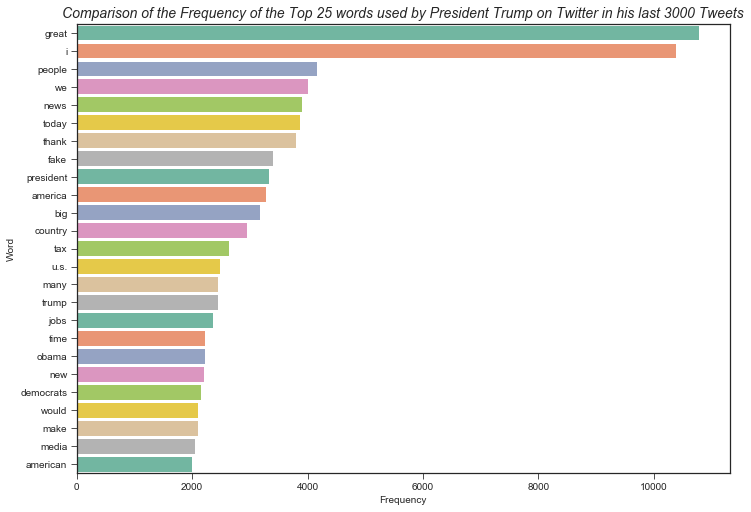

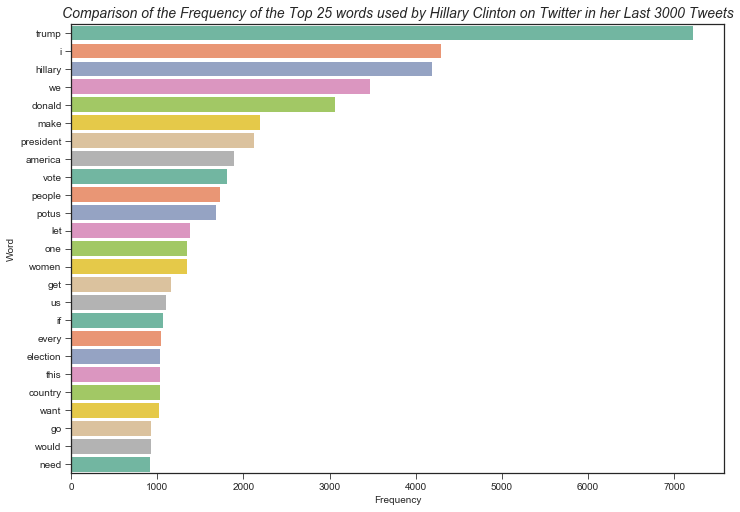

In [9]:
# Creates figure Comparing Top 25 words used by the 2016 Presidential Nominees on Twitter in their Last 3000 Tweets
sns.set_style('ticks')
pal = sns.color_palette("Set2", 25)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by President Trump on Twitter in his last 3000 Tweets',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=trump_dist)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by Hillary Clinton on Twitter in her Last 3000 Tweets',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=clinton_dist)

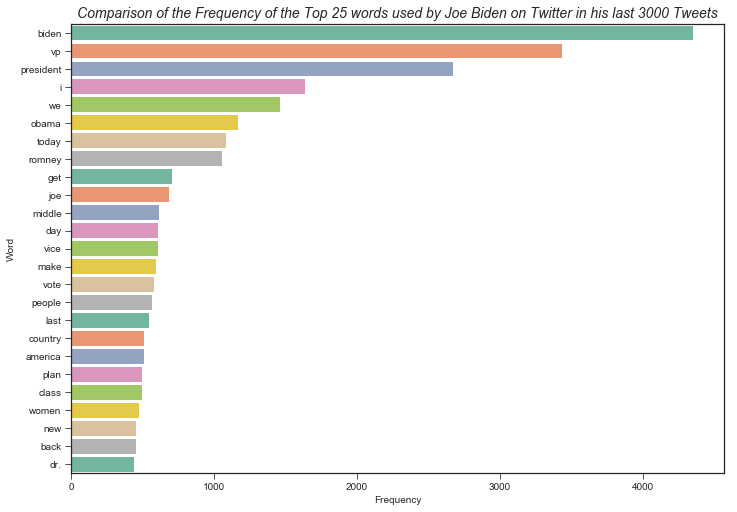

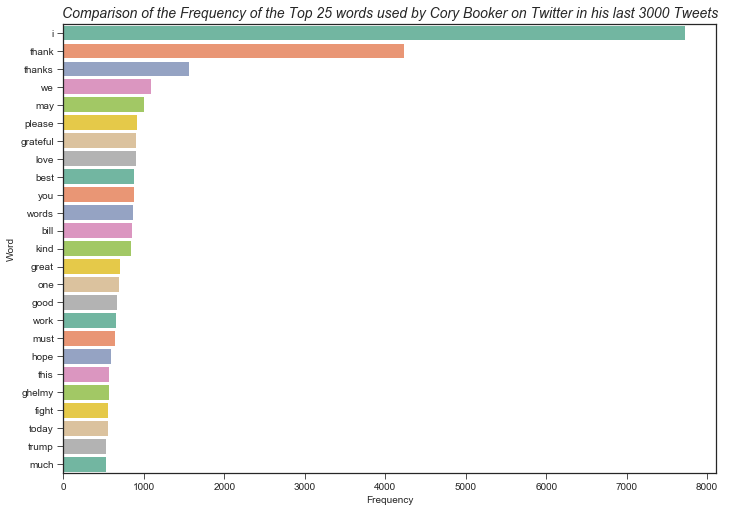

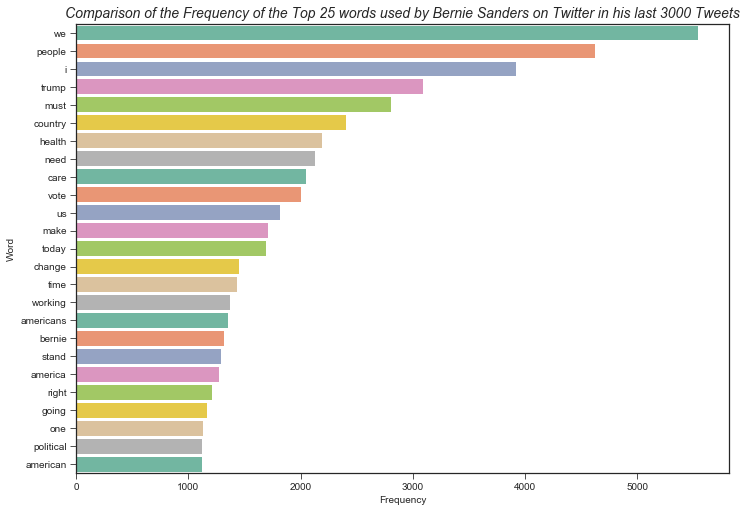

In [10]:
# Creates figure comparing top 25 words used by the Top 6 Potential 2020 Democratic Presidential Candidates on Twitter
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by Joe Biden on Twitter in his last 3000 Tweets',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=biden_dist)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by Cory Booker on Twitter in his last 3000 Tweets',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=booker_dist)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by Bernie Sanders on Twitter in his last 3000 Tweets',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=sanders_dist)

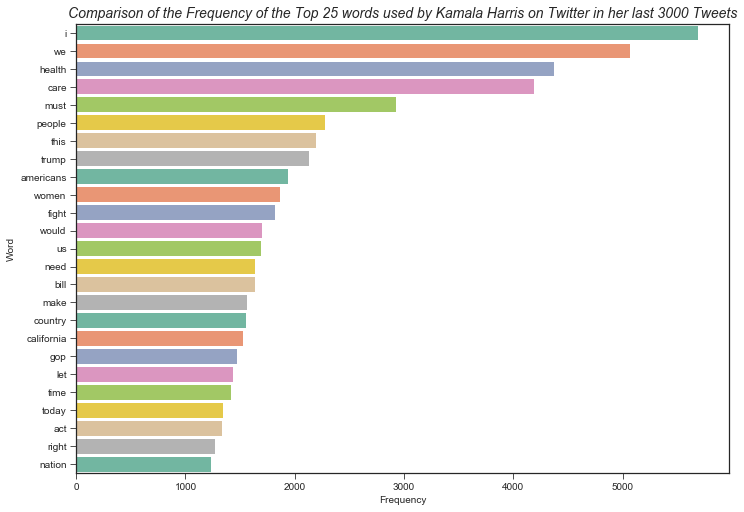

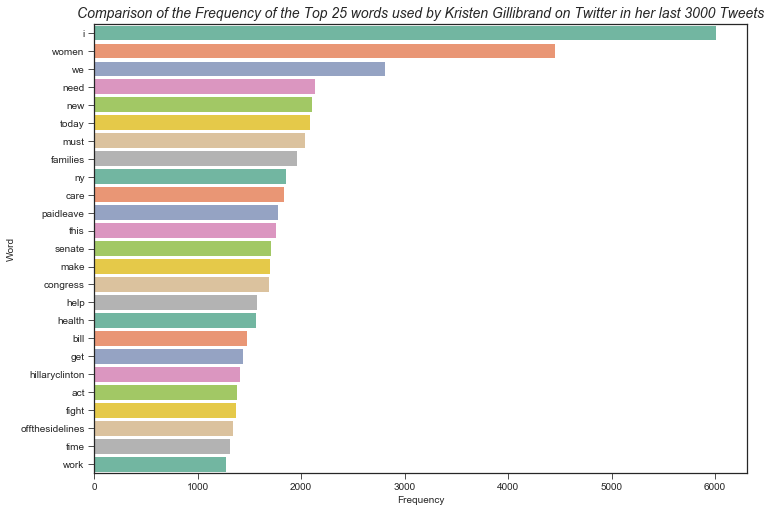

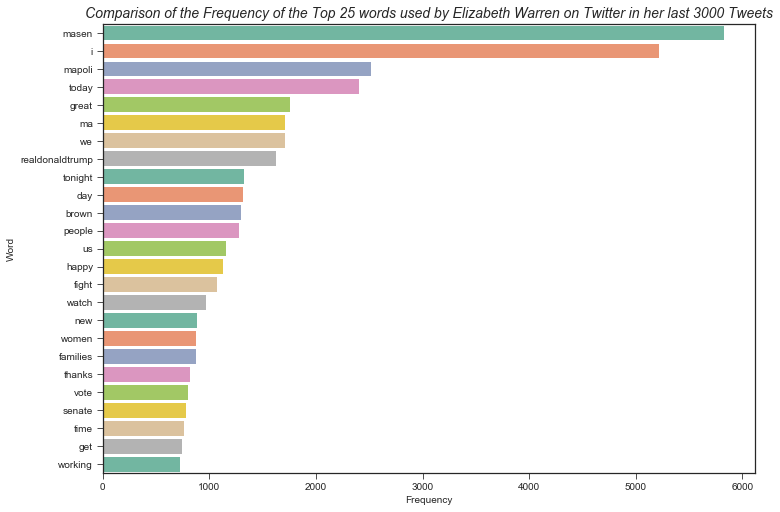

In [11]:
# Creates figure comparing top 25 words used by the Top 6 Potential 2020 Democratic Presidential Candidates on Twitter
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by Kamala Harris on Twitter in her last 3000 Tweets',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=harris_dist)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by Kristen Gillibrand on Twitter in her last 3000 Tweets',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=gillibrand_dist)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by Elizabeth Warren on Twitter in her last 3000 Tweets',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=warren_dist)

A visual representation of the frequency of the top 25 words used by from each of these politicians illustrates the priorities of each politician and their approach to social media interaction. Take note of how often the word 'Trump'
(or 'Donald' or 'realDonaldTrump') appears in each individual chart and the overall positivity/negativity of the most used words of each individual.